In [2]:
import requests
from bs4 import BeautifulSoup
from PIL import Image
from StringIO import StringIO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm

In [3]:
import requests
from bs4 import BeautifulSoup
from PIL import Image
from StringIO import StringIO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm

def create_request(asin_list):
    recommendations = ','.join([str(_) for _ in asin_list])
    url = "http://www.asinlab.com/php/convertfromasin.php?asin_num=" + recommendations + "&id_type=UPC&bulk=true&x=false"
    header = {}
    cookie = {}
    header["Accept"] = "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8"
    header["Accept-Encoding"] = "gzip, deflate"
    header["Accept-Language"] = "en-US,en;q=0.9"
    cookie["PHPSESSID"] = "7265269b431e4d9d9e4edd079f8da21c"
    cookie["sc_is_visitor_unique"] = "rx11430932.1524382929.F7A1330878D04FF9DF09539FE782C5B9.1.1.1.1.1.1.1.1.1"
    header["Referer"] = "http://www.asinlab.com/asin-to-upc-bulk-lookup/"
    header["User-Agent"] = "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/66.0.3359.117 Safari/537.36"
    return url, header, cookie

def get_recommendation_items(asin_list):
    url, header, cookie = create_request(asin_list)
    r = requests.get(url, headers=header, cookies=cookie)
    soup = BeautifulSoup(r.content, "lxml")
    urls = []
    imgs = []
    names = []
    for tr in list(soup.find_all('tr'))[1:]:
        urls.append(list(tr.children)[0].find('img')['src'])
        img_response = requests.get(urls[-1])
        img = Image.open(StringIO(img_response.content))
        imgs.append(img)
        names.append(list(tr.children)[6].find('div').get_text())

    f, axarr = plt.subplots(1, len(imgs))

    for i in range(len(imgs)):
        axarr[i].imshow(imgs[i], cmap = cm.Greys_r)
        axarr[i].set_title(names[i])
        axarr[i].axis('off')
        f.tight_layout() 

    plt.show()

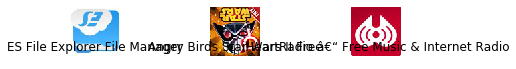

In [4]:
asin_list = ['B008K6HN8I',
'B00F8H0LM2',
'B0080K98U0',
'B00EDEMLTW']
get_recommendation_items(asin_list)

In [285]:
#url = "https://api.sellerprime.com/free_tool/asincheck?product_id=B0080JJLBW"
r = requests.get(url, headers=header, cookies=cookie)

In [286]:
soup = BeautifulSoup(r.content, "lxml")

In [287]:
print (soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <style>
   #bulk {
    font-family: "Trebuchet MS", Arial, Helvetica, sans-serif;
	font-size:	11px;
    border-collapse: collapse;
    width: 100%;
}

#bulk td, #bulk th {
    border: 1px solid #ddd;
    padding: 2px;
}

#bulk tr:nth-child(even){background-color: #f2f2f2;}

#bulk tr:hover {background-color: #ddd;}

#bulk th {
    padding-top: 6px;
    padding-bottom: 6px;
    text-align: left;
    background-color: #385A87;
    color: white;
}
  </style>
  <script src="http://asinlab.com/js/fileshandler.js">
  </script>
 </head>
 <body>
  <center>
   <p id="wait">
   </p>
  </center>
  <script>
   document.getElementById("wait").innerHTML = '<img src = "http://www.asinlab.com/images/pleasewait.gif"/>';
  </script>
  <center>
   <button onclick="downloadCurrentHtmlPage()">
    Download Results
   </button>
  </center>
  <div id="results">
   <center>
    <h2>
     ASIN Lookup Results
    </h2>
   </center>
   <table border="1" cellpadding="1" cellspacing

In [288]:

#for i in range(len(imgs)):
   #show_img_from_url(imgs[i], names[i])

In [259]:
img_response = requests.get(imgs[0])
img = Image.open(StringIO(img_response.content))

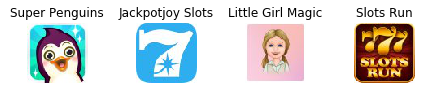